# Linear regression example

Ideia [Susan Li](https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a)


https://github.com/susanli2016/PySpark-and-MLlib/blob/master/Linear_regression_house.ipynb

https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a

Melhorias ao model podem ser encontradas aqui: https://medium.com/analytics-vidhya/linear-regression-and-decision-tree-implementation-using-pyspark-bfcd93dee86

In [31]:
# Import PySpark and create a SparkSession
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("ImportData").getOrCreate()

In [32]:
spark

# Ler o ficheiro

In [33]:
# Read a CSV file and create a DataFrame
df_customers=spark.read.option("header","true").csv('./data/customers_data.csv',inferSchema=True)

In [34]:
df_customers.show(10,truncate=4)

+----+---+---+---------+-------+-------+-------+--------+-----+---------+----+---------+------+-------+
|  Id|age|sex|dayswfreq|tbilled|maccess|freeuse|nentries|cfreq|nrenewals|cref|startDate|months|dropout|
+----+---+---+---------+-------+-------+-------+--------+-----+---------+----+---------+------+-------+
|0...| 23|  1|        7|   37.6|   1.35|      0|       6|    7|        0|   0|     2...|     1|      1|
|0...| 34|  1|      328|   2...|   0.54|      0|      39|    7|        2|   0|     2...|    19|      0|
|0...| 24|  0|        3|   1...|    0.8|      0|      28|    7|        0|   0|     2...|     8|      1|
|0...| 20|  1|       41|   71.6|    1.0|      0|      13|    7|        0|   0|     2...|     3|      1|
|0...| 21|  1|       18|   1...|   0.08|      0|       7|    7|        3|   0|     2...|    24|      1|
|0...| 20|  0|       38|   1...|   0.33|      0|      11|    7|        2|   0|     2...|    10|      1|
|0...| 26|  1|      279|   53.2|   0.16|      0|       6|    7| 

# Data exploration

In [35]:
df_customers.cache()
df_customers.printSchema()

23/03/05 11:16:13 WARN CacheManager: Asked to cache already cached data.
root
 |-- Id: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- dayswfreq: integer (nullable = true)
 |-- tbilled: double (nullable = true)
 |-- maccess: double (nullable = true)
 |-- freeuse: integer (nullable = true)
 |-- nentries: integer (nullable = true)
 |-- cfreq: integer (nullable = true)
 |-- nrenewals: integer (nullable = true)
 |-- cref: integer (nullable = true)
 |-- startDate: timestamp (nullable = true)
 |-- months: integer (nullable = true)
 |-- dropout: integer (nullable = true)



Perform descriptive analytics

In [36]:
df_customers.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Id,5216,None,None,00130FE8-5D34-4C66-9819-1EB0BFE69979,FFFB7214-F2FE-4AC0-8BD2-DB1CD47BDBEF
age,5216,27.87480828220859,11.800086531430129,0,93
sex,5216,0.35161042944785276,0.47751884953084844,0,1
dayswfreq,5216,76.32745398773007,101.76114826391365,0,991
tbilled,5216,155.22543328219862,162.36556360745013,3.6,3747.2
maccess,5216,0.8919516871165657,0.7632507723424429,0.01,10.33
freeuse,5211,0.04874304356169641,0.215351013261445,0,1
nentries,5216,29.04045245398773,41.13111757640234,1,585
cfreq,5210,6.861804222648752,0.7213523487450144,2,7


Scatter matrix to detect early correlations

In [37]:
df_customers.dtypes[1][0]

'age'

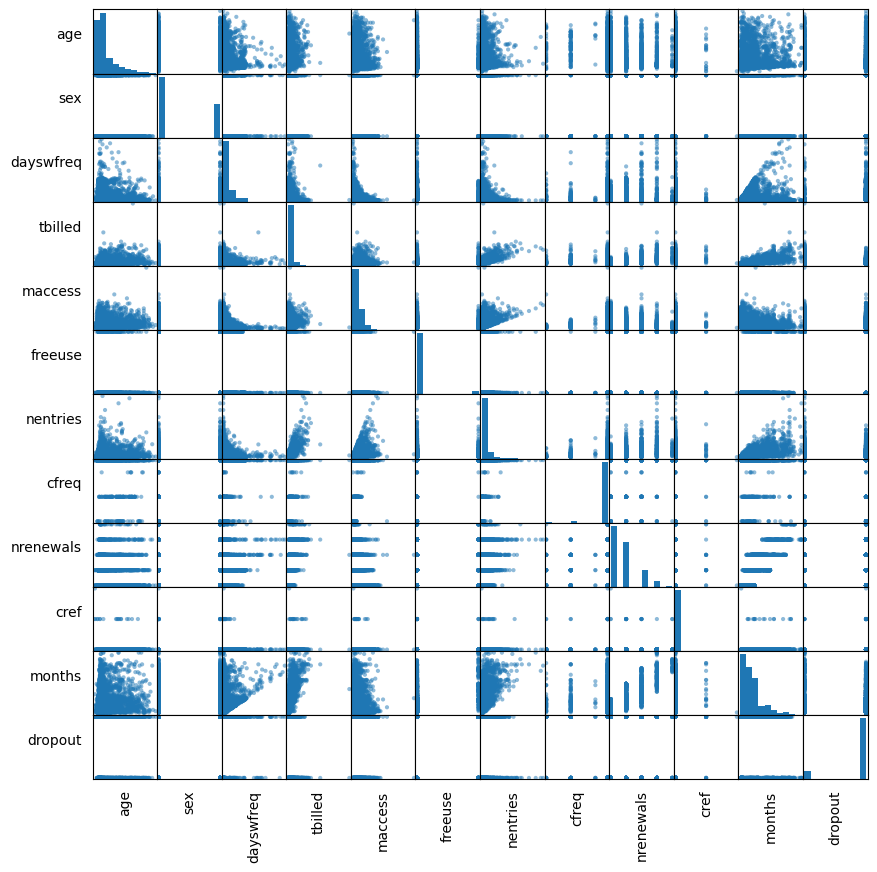

In [38]:
import pandas as pd

# percorrer só os dtypes int e double 
# t é dtypes por cada selecionar só o nome da variável df_customers.dtypes[1][0]
numeric_features = [t[0] for t in df_customers.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = df_customers.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [39]:
cols = ["age", "sex", "dayswfreq","tbilled","maccess","freeuse","nentries","cfreq","nrenewals","months"]
for col in cols:
    print( "Correlation between dropout and ", col, df_customers.stat.corr('tbilled',col))

Correlation between dropout and  age 0.2660080219045918
Correlation between dropout and  sex 0.038408417780323924
Correlation between dropout and  dayswfreq -0.13374712801761984
Correlation between dropout and  tbilled 1.0
Correlation between dropout and  maccess 0.17757826417635567
Correlation between dropout and  freeuse 0.12826554516466207
Correlation between dropout and  nentries 0.7323458837243343
Correlation between dropout and  cfreq -0.1216874733016454
Correlation between dropout and  nrenewals 0.5485235949298131
Correlation between dropout and  months 0.6849995969880278


# Implementar o algoritmo

In [40]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import VectorAssembler
from graphviz import Digraph

In [41]:
# eliminar nulls
df_customers=df_customers.na.drop()

In [42]:
# Prepare the features and label columns
feature_cols = ["age", "sex", "dayswfreq","maccess","freeuse","nentries","cfreq","nrenewals","months","dropout"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(df_customers).select("features", "dropout")


In [43]:
# vamos visualizar o conteúdo com vector assembler
# transform para criar um dataframe e aplicarmos o show
from pyspark.sql.functions import col
out=assembler.transform(df_customers)

out.select(["features","tbilled"]).show(truncate=False)

+-----------------------------------------------+-------+
|features                                       |tbilled|
+-----------------------------------------------+-------+
|[23.0,1.0,7.0,1.35,0.0,6.0,7.0,0.0,1.0,1.0]    |37.6   |
|[34.0,1.0,328.0,0.54,0.0,39.0,7.0,2.0,19.0,0.0]|205.6  |
|[24.0,0.0,3.0,0.8,0.0,28.0,7.0,0.0,8.0,1.0]    |140.0  |
|[20.0,1.0,41.0,1.0,0.0,13.0,7.0,0.0,3.0,1.0]   |71.6   |
|[21.0,1.0,18.0,0.08,0.0,7.0,7.0,3.0,24.0,1.0]  |113.2  |
|[20.0,0.0,38.0,0.33,0.0,11.0,7.0,2.0,10.0,1.0] |118.6  |
|[26.0,1.0,279.0,0.16,0.0,6.0,7.0,1.0,9.0,1.0]  |53.2   |
|[22.0,0.0,292.0,0.63,0.0,29.0,7.0,1.0,11.0,1.0]|73.7   |
|[32.0,1.0,204.0,0.11,0.0,11.0,7.0,2.0,25.0,0.0]|240.5  |
|[20.0,1.0,21.0,0.33,0.0,8.0,7.0,0.0,6.0,1.0]   |95.6   |
|[50.0,0.0,15.0,1.22,0.0,163.0,7.0,3.0,34.0,0.0]|1238.4 |
|[21.0,0.0,133.0,0.62,0.0,15.0,7.0,1.0,6.0,1.0] |73.6   |
|[43.0,1.0,1.0,0.34,0.0,5.0,7.0,0.0,4.0,1.0]    |76.6   |
|[23.0,0.0,25.0,0.04,0.0,1.0,7.0,0.0,6.0,1.0]   |45.1   |
|[41.0,0.0,7.0

In [44]:
# Split data
train, test = out.randomSplit([0.7, 0.3],seed=123)

In [45]:
train.show(truncate=2)

+---+---+---+---------+-------+-------+-------+--------+-----+---------+----+---------+------+-------+--------+
| Id|age|sex|dayswfreq|tbilled|maccess|freeuse|nentries|cfreq|nrenewals|cref|startDate|months|dropout|features|
+---+---+---+---------+-------+-------+-------+--------+-----+---------+----+---------+------+-------+--------+
| 00| 23|  1|        7|     37|     1.|      0|       6|    7|        0|   0|       20|     1|      1|      [2|
| 00| 34|  1|       32|     20|     0.|      0|      39|    7|        2|   0|       20|    19|      0|      [3|
| 00| 20|  1|       41|     71|     1.|      0|      13|    7|        0|   0|       20|     3|      1|      [2|
| 00| 21|  1|       18|     11|     0.|      0|       7|    7|        3|   0|       20|    24|      1|      [2|
| 00| 20|  0|       38|     11|     0.|      0|      11|    7|        2|   0|       20|    10|      1|      [2|
| 00| 22|  0|       29|     73|     0.|      0|      29|    7|        1|   0|       20|    11|      1|  

In [46]:
train.describe().show(truncate=5)

+-------+-----+-----+-----+---------+-------+-------+-------+--------+-----+---------+-----+------+-------+
|summary|   Id|  age|  sex|dayswfreq|tbilled|maccess|freeuse|nentries|cfreq|nrenewals| cref|months|dropout|
+-------+-----+-----+-----+---------+-------+-------+-------+--------+-----+---------+-----+------+-------+
|  count| 3611| 3611| 3611|     3611|   3611|   3611|   3611|    3611| 3611|     3611| 3611|  3611|   3611|
|   mean| null|27...|0....|    75...|  15...|  0....|  0....|   28...|6....|    0....|0....| 9....|  0....|
|  st...| null|11...|0....|    98...|  16...|  0....|  0....|   40...|0....|    0....|0....| 8....|  0....|
|    min|00...|   14|    0|        0|   23.6|   0.01|      0|       1|    2|        0|    0|     0|      0|
|    max|FF...|   93|    1|      932|  37...|  10.33|      1|     563|    7|        4|    2|    47|      1|
+-------+-----+-----+-----+---------+-------+-------+-------+--------+-----+---------+-----+------+-------+



In [47]:
test.describe().show(truncate=5)

+-------+-----+-----+-----+---------+-------+-------+-------+--------+-----+---------+-----+------+-------+
|summary|   Id|  age|  sex|dayswfreq|tbilled|maccess|freeuse|nentries|cfreq|nrenewals| cref|months|dropout|
+-------+-----+-----+-----+---------+-------+-------+-------+--------+-----+---------+-----+------+-------+
|  count| 1594| 1594| 1594|     1594|   1594|   1594|   1594|    1594| 1594|     1594| 1594|  1594|   1594|
|   mean| null|27...|0....|    78...|  15...|  0....|  0....|   29...|6....|    0....|0....| 9....|  0....|
|  st...| null|11...|0....|    10...|  14...|  0....|  0....|   41...|0....|    0....|0....| 7....|  0....|
|    min|00...|    0|    0|        0|    3.6|   0.01|      0|       1|    2|        0|    0|     1|      0|
|    max|FF...|   80|    1|      991|  11...|   5.81|      1|     585|    7|        4|    1|    41|      1|
+-------+-----+-----+-----+---------+-------+-------+-------+--------+-----+---------+-----+------+-------+



In [48]:
# Train model
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(labelCol="tbilled", featuresCol="features",regParam=0.3)
lr_model = lr.fit(train)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [2.165458032185497,1.1290845310275541,-0.1929012235740842,-22.01526124534931,-58.57737758351587,2.0626598111509717,-12.859829035259665,-1.1214339519536496,7.496065036004965,-50.28200034943501]
Intercept: 135.59404155350197


Sumarizar o modelo

In [19]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 96.033224
r2: 0.680174


R squared at 0.68 indicates that in our model, approximate 68% of the variability in “tbilled” can be explained using the model

In [20]:
train.describe().show()

+-------+--------------------+------------------+------------------+-----------------+------------------+------------------+--------------------+------------------+-----------------+------------------+--------------------+-----------------+------------------+
|summary|                  Id|               age|               sex|        dayswfreq|           tbilled|           maccess|             freeuse|          nentries|            cfreq|         nrenewals|                cref|           months|           dropout|
+-------+--------------------+------------------+------------------+-----------------+------------------+------------------+--------------------+------------------+-----------------+------------------+--------------------+-----------------+------------------+
|  count|                3611|              3611|              3611|             3611|              3611|              3611|                3611|              3611|             3611|              3611|                361

# Decision Tree Regression

In [52]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'tbilled')
dt_model = dt.fit(train)
dt_predictions = dt_model.transform(test)
#dt_evaluator = RegressionEvaluator(labelCol="featured", predictionCol="tbilled", metricName="rmse")
#rmse = dt_evaluator.evaluate(dt_predictions)
#print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Variáveis mais importantes

In [65]:
dt_model.featureImportances

SparseVector(10, {0: 0.0923, 2: 0.0201, 3: 0.0149, 5: 0.6013, 6: 0.0016, 7: 0.0032, 8: 0.2667})

In [69]:
feature_cols

['age',
 'sex',
 'dayswfreq',
 'maccess',
 'freeuse',
 'nentries',
 'cfreq',
 'nrenewals',
 'months',
 'dropout']

Mais importante nentries e nrenewals

Arvore de decisão

In [73]:
print(dt_model.toDebugString)

DecisionTreeRegressionModel: uid=DecisionTreeRegressor_26000365f7aa, depth=5, numNodes=63, numFeatures=10
  If (feature 5 <= 59.5)
   If (feature 8 <= 12.5)
    If (feature 5 <= 14.5)
     If (feature 0 <= 28.5)
      If (feature 5 <= 7.5)
       Predict: 55.672444733420065
      Else (feature 5 > 7.5)
       Predict: 79.03471074380165
     Else (feature 0 > 28.5)
      If (feature 8 <= 3.5)
       Predict: 74.94712446351936
      Else (feature 8 > 3.5)
       Predict: 119.21971291866029
    Else (feature 5 > 14.5)
     If (feature 8 <= 6.5)
      If (feature 0 <= 29.5)
       Predict: 98.90115942028984
      Else (feature 0 > 29.5)
       Predict: 127.56735537190077
     Else (feature 8 > 6.5)
      If (feature 0 <= 32.5)
       Predict: 149.61806818181824
      Else (feature 0 > 32.5)
       Predict: 247.22663265306144
   Else (feature 8 > 12.5)
    If (feature 0 <= 28.5)
     If (feature 5 <= 19.5)
      If (feature 5 <= 5.5)
       Predict: 80.07142857142857
      Else (feature 5 >

In [74]:
# Stop the SparkSession
spark.stop()